In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-04-17 14:31:10.934786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn import datasets
plt.figure(figsize=(1,1))
digits = datasets.load_digits()

<Figure size 100x100 with 0 Axes>

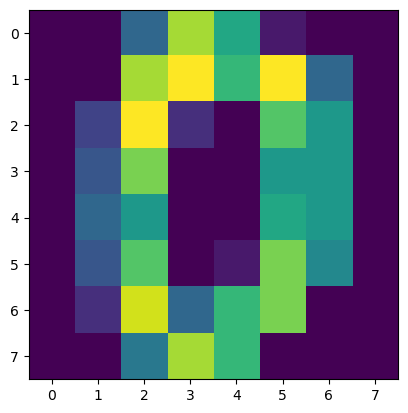

In [5]:
plt.imshow(digits.images[0])

In [9]:
num_sample = len(digits.images)
data = digits.images.reshape((num_sample,-1))
data.shape

(1797, 64)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(data,digits.target,test_size=0.05)

In [7]:
len(digits.images)

1797

In [11]:
columns = [str(f"p_{i}") for i in range(1,65)]

## Building features columns

In [13]:
feature_columns = []
for col in columns:
    feature_columns.append(tf.feature_column.numeric_column(key=col))

In [14]:
feature_columns

[NumericColumn(key='p_1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_10', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_11', sh

In [39]:
def input_fn(features,label,training=True,batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),label))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [40]:
dftrain = pd.DataFrame(x_train,columns=columns)

In [41]:
dftrain.head()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_55,p_56,p_57,p_58,p_59,p_60,p_61,p_62,p_63,p_64
0,0.0,0.0,3.0,10.0,12.0,12.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,16.0,15.0,3.0,0.0,0.0
1,0.0,3.0,15.0,13.0,12.0,8.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,2.0,15.0,16.0,2.0,0.0,0.0,0.0
2,0.0,2.0,15.0,13.0,0.0,0.0,0.0,0.0,0.0,12.0,...,6.0,0.0,0.0,1.0,16.0,16.0,16.0,12.0,7.0,0.0
3,0.0,0.0,4.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,16.0,14.0,1.0,0.0,0.0
4,0.0,0.0,4.0,13.0,16.0,16.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,14.0,0.0,0.0,0.0,0.0


In [52]:
classifier = tf.estimator.DNNClassifier(hidden_units=[256,128,64,32],n_classes=10,optimizer='Adagrad',feature_columns=feature_columns,model_dir='classifier_test')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'classifier_test', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
classifier.train(input_fn=lambda:input_fn(dftrain,y_train,training=True),steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into classifier_test/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.9392333, step = 0
INFO:tensorflow:global_step/sec: 197.699
INFO:tensorflow:loss = 1.0324988, step = 100 (0.507 sec)
INFO:tensorflow:global_step/sec: 325.736
INFO:tensorflow:loss = 0.6446639, step = 200 (0.307 sec)
INFO:tensorflow:global_step/sec: 304.706
INFO:tensorflow:loss = 0.42884567, step = 300 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.443
INFO:tensorflow:loss = 0.3161, step = 400 (0.330 sec)
INFO:tensorflow:global_step/sec: 325.403
INFO:tensorflow:loss = 0.15876909, step = 500 (0.307 sec)
INFO:ten

In [54]:
dftest = pd.DataFrame(x_test,columns=columns)
dftest.head()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_55,p_56,p_57,p_58,p_59,p_60,p_61,p_62,p_63,p_64
0,0.0,0.0,0.0,0.0,5.0,14.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,13.0,4.0,0.0
1,0.0,0.0,2.0,15.0,16.0,9.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,3.0,15.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,10.0,0.0,0.0
3,0.0,3.0,14.0,15.0,6.0,0.0,0.0,0.0,0.0,7.0,...,6.0,0.0,0.0,4.0,15.0,13.0,12.0,11.0,1.0,0.0
4,0.0,0.0,0.0,5.0,15.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,15.0,13.0,1.0,0.0


In [72]:
classifier.evaluate(input_fn=lambda:input_fn(dftest,y_test,training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-04-17T15:33:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from classifier_test/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.69178s
INFO:tensorflow:Finished evaluation at 2023-04-17-15:34:00
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9777778, average_loss = 0.07132772, global_step = 2000, loss = 0.07202179
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: classifier_test/model.ckpt-2000


{'accuracy': 0.9777778,
 'average_loss': 0.07132772,
 'loss': 0.07202179,
 'global_step': 2000}

In [69]:
%reload_ext tensorboard

In [73]:
%tensorboard --logdir ./classifier_test

In [71]:
!kill 58151